In [15]:
"""
  _____       _   _                 
 |  __ \     | | | |                
 | |__) |   _| |_| |__   ___  _ __  
 |  ___/ | | | __| '_ \ / _ \| '_ \ 
 | |   | |_| | |_| | | | (_) | | | |
 |_|    \__, |\__|_| |_|\___/|_| |_|
         __/ |                      
        |___/                                                           
"""
pass
############## 从这里开始run below ####################

In [16]:
"""
读取存储文件，每次的st坐标
"""

import pickle

with open("st.txt", "rb") as f:
    
    dict_stops = pickle.load(f) # 运行id：停车点集合
    
len(dict_stops)

100

In [17]:
"""
创建st的集合
"""

set_stops = set()

for s in dict_stops.values(): # 读取各次实验的集合并update
    
    set_stops.update(s)

In [18]:
"""
统计st频次
"""

dict_stfq = dict() # 点坐标：频次

for stp in set_stops:
    
    count = 0
    for se in dict_stops.values(): # 读取各次实验的集合
        if stp in se:
            count += 1
            
    dict_stfq[stp] = count

In [19]:
"""
st频次排序，字典翻转（以frq为index建立list）
"""

from copy import deepcopy

set_frqvs = set(dict_stfq.values())

list_frq = []

nrank = len(set_frqvs) # 一共有多少种频次

set_temp = deepcopy(set_frqvs) # 用于逐次找到最大并且删除的集合

list_rank = [] # 点列表，不含频次

while len(set_temp) != 0:
    
    frqv = max(set_temp) # 取剩余集合中最大频次
    
    list_temp = []
    
    for k in dict_stfq.keys():
        
        if dict_stfq[k] == frqv: # 如果有字典值等于当前频次
            
            list_temp.append(k) # 记录坐标
            
    list_rank.append(list_temp)
        
    set_temp.remove(frqv)
    
    list_frq.append(frqv)
    
    print("############# Rank " + str(len(set_frqvs)-len(set_temp)))
    print("Frequency:")
    print(frqv)
    print("Number of points:")
    print(len(list_temp))
    #print("Points:")
    #print(list_temp)

############# Rank 1
Frequency:
24
Number of points:
1
############# Rank 2
Frequency:
23
Number of points:
1
############# Rank 3
Frequency:
22
Number of points:
3
############# Rank 4
Frequency:
21
Number of points:
3
############# Rank 5
Frequency:
20
Number of points:
2
############# Rank 6
Frequency:
19
Number of points:
15
############# Rank 7
Frequency:
18
Number of points:
14
############# Rank 8
Frequency:
17
Number of points:
15
############# Rank 9
Frequency:
16
Number of points:
27
############# Rank 10
Frequency:
15
Number of points:
38
############# Rank 11
Frequency:
14
Number of points:
43
############# Rank 12
Frequency:
13
Number of points:
57
############# Rank 13
Frequency:
12
Number of points:
54
############# Rank 14
Frequency:
11
Number of points:
80
############# Rank 15
Frequency:
10
Number of points:
71
############# Rank 16
Frequency:
9
Number of points:
85
############# Rank 17
Frequency:
8
Number of points:
69
############# Rank 18
Frequency:
7
Number of po

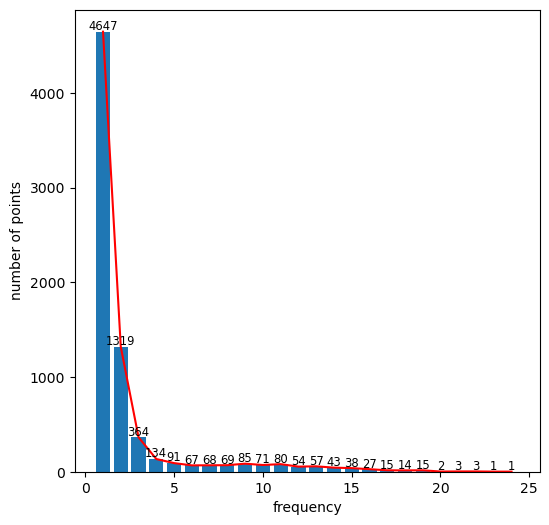

In [20]:
"""
画频次分布图
"""

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

x = [list_frq[i] for i in range(nrank)]
y = [len(list_rank[i]) for i in range(nrank)]

ax.bar(x,y)

ax.plot(x,y,color = "red")

for i in range(nrank):
    ax.text(list_frq[i], len(list_rank[i]) + 20, str(len(list_rank[i])), size = "small", ha = "center")
    
plt.xlabel('frequency')

plt.ylabel("number of points")

plt.show()

In [21]:
"""
读取cluster和line设置
"""

import pickle

with open("clusters.txt", "rb") as f:
    
    dict_clinfo = pickle.load(f)
    
with open("lines.txt", "rb") as f:
    
    dict_lineinfo = pickle.load(f)
    

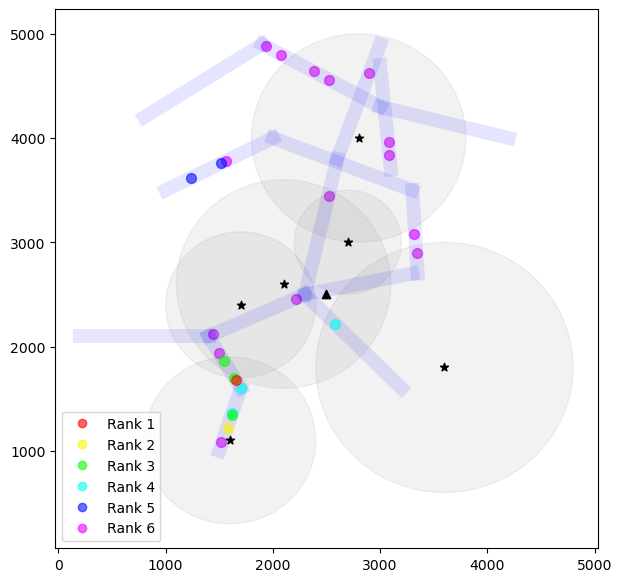

In [22]:
"""
画图
"""

# 要绘制第几到第几等？
# 例如：lr=1，hr=4，绘制从2到4等

def plotrank(lr, hr):
    
    rrange = hr - lr
    
    if hr > nrank:
        
        return

    import matplotlib.pyplot as plt
    from matplotlib.patches import Circle

    fig, ax = plt.subplots(1, 1, figsize=(7, 7))

    cm = plt.cm.get_cmap('hsv')

    for i in range(lr, hr):

        for ii in range(len(list_rank[i])): # 直接对上
            
            x = list_rank[i][ii][0]
            y = list_rank[i][ii][1]
            ax.scatter(x, y, color = cm((i - lr) / rrange), marker = "o" , alpha = 0.6, zorder = hr - lr - i, s = 50) 
            #ax.scatter(x, y, color = "gray", marker = "o" , alpha = 0.5, s = 50) 
            #ax.text(x, y, str(ii), size = "xx-small", ha = "center", va = "center", zorder = 10)

    ax.scatter(2500, 2500, color = "black", marker = "^", zorder = hr - lr)

    for i in range(len(dict_clinfo)):

        xc, yc = dict_clinfo[i]["center"]
        r = dict_clinfo[i]["radius"] # 上面两个不能合并
        ax.scatter(xc, yc, color = "black", marker = "*", zorder = hr - lr)
        cir = Circle(xy = (xc, yc), radius = r, alpha = 0.1, color = "grey")
        ax.add_patch(cir)


    for i in range(len(dict_lineinfo)):

        x0, y0 = dict_lineinfo[i]["start"]
        x1, y1 = dict_lineinfo[i]["end"]

        ax.plot([x0, x1], [y0, y1], color = "blue", linewidth = 10, alpha = 0.1)


    from matplotlib.lines import Line2D
    dummies = []
    for i in range(lr, hr):
        dummies.append(Line2D([], [], linestyle='None', color = cm((i - lr) / rrange), alpha = 0.6, marker = "o", label = "Rank " + str(i+1)))
    ax.legend(handles = dummies)
    
    plt.show()
    
    return

plotrank(0,6)

In [23]:
# 存储本次停车点排行

import pickle
    
with open("list_rank.txt", "wb") as f:
    
    pickle.dump(list_rank, f)

In [24]:
list_rank

[[(1660, 1680)],
 [(1580, 1220)],
 [(1620, 1340), (1540, 1860), (1640, 1700)],
 [(1620, 1360), (2580, 2220), (1700, 1600)],
 [(1520, 3760), (1240, 3620)],
 [(3340, 2900),
  (2520, 3440),
  (1440, 2120),
  (1940, 4880),
  (2080, 4800),
  (2380, 4640),
  (3080, 3840),
  (1500, 1940),
  (1560, 3780),
  (1520, 1080),
  (3320, 3080),
  (3080, 3960),
  (2520, 4560),
  (2220, 2460),
  (2900, 4620)],
 [(1420, 2060),
  (3060, 2660),
  (2420, 3040),
  (1620, 2200),
  (3340, 2720),
  (1220, 2100),
  (2000, 2360),
  (3000, 1800),
  (3300, 3420),
  (1600, 1320),
  (2020, 2380),
  (3340, 2860),
  (1760, 3880),
  (1620, 4720)],
 [(2540, 3520),
  (2800, 2000),
  (2880, 4360),
  (2220, 4720),
  (1560, 1840),
  (1160, 3580),
  (3080, 3900),
  (1700, 2240),
  (2720, 2080),
  (3000, 4620),
  (1580, 1260),
  (2040, 2380),
  (1960, 3980),
  (1400, 2100),
  (2560, 3600)],
 [(2740, 2060),
  (3340, 3000),
  (1400, 3700),
  (1120, 4400),
  (1660, 1480),
  (3340, 2960),
  (1080, 3540),
  (1660, 1460),
  (2200, 2

In [25]:
list_slst = [(2300, 4680), (1540, 1860), (1440, 3720), (2820, 4400), (1700, 1600), (2020, 2380), (3220, 2680)]

In [26]:
# 存储挑选的停车点

import pickle
    
with open("slst.txt", "wb") as f:
    
    pickle.dump(list_slst, f)

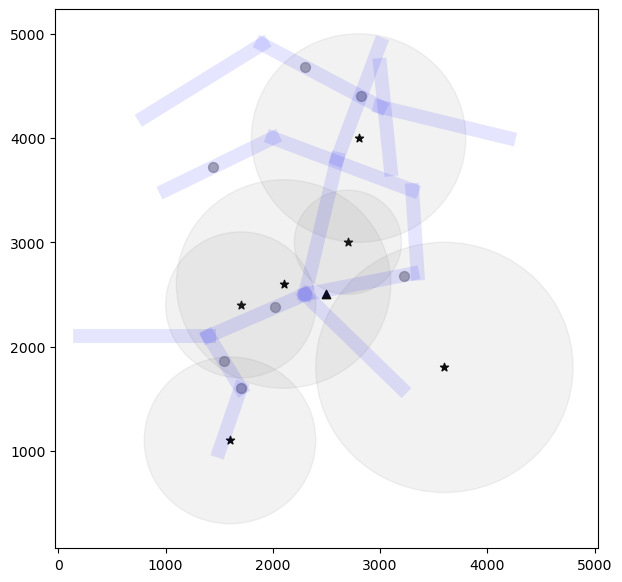

In [27]:
"""
画出挑选的停车点
"""

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

for (x, y) in list_slst:

    ax.scatter(x, y, color = "gray", marker = "o" , alpha = 0.6, zorder = 0, s = 50) 

ax.scatter(2500, 2500, color = "black", marker = "^")

for i in range(len(dict_clinfo)):

    xc, yc = dict_clinfo[i]["center"]
    r = dict_clinfo[i]["radius"] # 上面两个不能合并
    ax.scatter(xc, yc, color = "black", marker = "*")
    cir = Circle(xy = (xc, yc), radius = r, alpha = 0.1, color = "grey")
    ax.add_patch(cir)


for i in range(len(dict_lineinfo)):

    x0, y0 = dict_lineinfo[i]["start"]
    x1, y1 = dict_lineinfo[i]["end"]

    ax.plot([x0, x1], [y0, y1], color = "blue", linewidth = 10, alpha = 0.1)

plt.show()

In [28]:
import pickle

with open("md.txt", "rb") as f:
    
    dict_md = pickle.load(f)
    
with open("results.txt", "rb") as f:
    
    dict_results = pickle.load(f)

In [29]:
sumd = sum(dict_md.values())
count =  len(dict_md)
sumd/count

452.0461560554917

In [30]:
sumt1, sumt2, sumdd1, sumdd2, sumdw2, sumrt1, sumrt2 = 0,0,0,0,0,0,0
for v in dict_results.values():
    sumt1 += v[0]
    sumt2 += v[1]
    sumdd1 += v[2]
    sumdd2 += v[3]
    sumdw2 += v[4]
    sumrt1 += v[5]
    sumrt2 += v[6]
    
print(sumt1/count)
print(sumt2/count)
print(sumdd1/count)
print(sumdd2/count)
print(sumdw2/count)
print(sumrt1/count)
print(sumrt2/count)

83422.1956724662
80619.36937820683
52160.815255138084
45646.37794917247
13891.408847755014
0.13363677263259888
65.93645314216614
